# A very hard classification problem
by: _Andrés M. Castillo_

*Universidad del Valle*

The aim of this practice is that the student put in practice all the theoretical knowledge about data mining to solve this classification problem. The dataset has been found in kaggle(https://www.kaggle.com/sayeera/classification). It does not have any description or discusion opened at the time I've written this. 

The challenge here, is to provide a classification model that predicts or explain the job satisfaction of the employees of a company, based on the related information available in this dataset. 

To acomplish the challenge, the studen must provide a very detailed and fancy descriptions of the variables depending of its type, and some analysis for each variable against the target variable "jobSatisfaction". Use historgrams, pie charts, scatter plots, boxplots, violins plots depending on what is more appropiated. 
<img src="visu.jpeg" alt="visualization" style="width: 600px;"/>

We start importing the needed libraries. 

In [162]:
# Descomentar en caso de No tener instaladas las librerias
#!conda install -c conda-forge ipywidgets -y
#!conda install -c anaconda graphviz python-graphviz -y
#!conda install -c conda-forge keras -y
#!conda install -c anaconda pydot -y
#!conda install -c anaconda seaborn -y

# importando el modulo numpy
import numpy as np

# importando el modulo pandas
import pandas as pd

# importando el modulo regexp
import re

# importando el modulo matplotlib
import matplotlib.pyplot as plt

#  importando el modulo train_test_split, learning_curve, ShuffleSplit de sklearn.model_selection
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit

#  importando el modulo tree de sklearn
from sklearn import tree

#  importando el modulo GaussianNB de sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

#  importando los modulos confusion_matrix, roc_curve, auc, accuracy_score de sklearn.metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

#  importando el modulo HandlerLine2D de matplotlib.legend_handler
from matplotlib.legend_handler import HandlerLine2D

# importando los modulos SVG, display de IPython.display
from IPython.display import SVG, display

# importando el modulo Source de graphviz
from graphviz import Source

# importando el modulo StandardScaler de sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# importando el modulo sns de seaborn
import seaborn as sns

# importando el modulo tensorflow
import tensorflow as tf

# importando el Sequential sns de keras.models
from keras.models import Sequential

# importando los modulos Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense de keras.layers
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

# importando el modulo plot_model de keras.utils.vis_utils
from keras.utils.vis_utils import plot_model

# importando el modulo Image de IPython.display
from IPython.display import Image

# importando el modulo warhing del Sistema Operativo
import warnings

# importando las librerias base del Sistema Operativo
import os

# Desabilitando los mensajes warning de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# funcion que captura los warning
def warn(*args, **kwargs):
    pass

# trigger que captura los warnings del sistema
#warnings.warn = warn

## Open the dataset

Each time we open a dataset file, it is better to print the column names, size of the dataset and a little description about it.

In [128]:
data=pd.read_csv("./data/Classification.csv")
print(data.columns)
print(data.shape)
data.describe()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1470, 33)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Make group of attributes depending on its type

Create 3 groups of attributes: real/numerical, ordinal and categorical.

Check: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [129]:
from pandas.api.types import CategoricalDtype

numericColumns = ["Age", "HourlyRate", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate", "PercentSalaryHike",  "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager" ]
factorColumns = ["Attrition", "Department", "BusinessTravel", "EducationField", "Gender", "JobRole", "OverTime"  ]
levelColumns = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "NumCompaniesWorked", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]
target = "JobSatisfaction"

# Assign to the index the corresponding column
data.index = data["EmployeeNumber"].values
# Convert to numeric attributes
# Nothing to do in python. Numeric is the dafault
for col in numericColumns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    

# loop to change each column to category type
for col in factorColumns:
    cat_type = CategoricalDtype(categories = None, ordered = False)
    data[col] = data[col].astype(dtype = cat_type)

# Conver to levels / Ordinals
for col in levelColumns:
    cat_type = CategoricalDtype(categories = None, ordered = True)
    data[col] = data[col].astype(dtype = cat_type)

# Delete the "EmployeeCount" and "EmployeeNumber" column from the dataframe
data = data.drop("EmployeeCount", axis=1)
data = data.drop("EmployeeNumber", axis=1)
data = data.drop("MaritalStatus", axis=1)

# Add a new attribute to try a binary class classification first. 
# It must be categorical. But booleans are actually categoricals
# data['class'] = data['JobSatisfaction'] > 2

# Understanding our data

Look at out target variable distribution. 
Check: http://cican17.com/data-visualization-with-python/

KeyError: 'class'

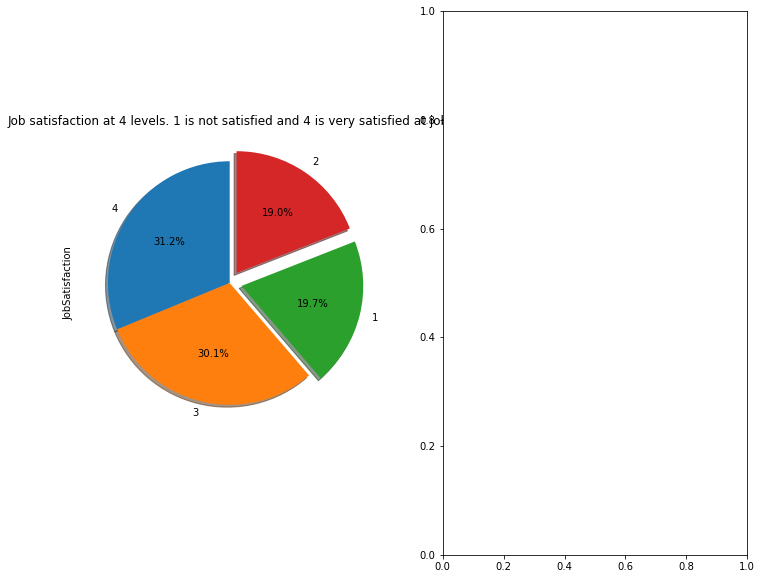

In [130]:
# declarando un objeto tipo Figura para desarrollar los subplots
fig = plt.figure(figsize=(20, 10))



ax = fig.add_subplot(1,2,1)
data['JobSatisfaction'].value_counts().plot(kind='pie', 
                                            figsize=(12, 10),
                                            autopct='%1.1f%%', # add in percentages
                                            startangle=90,     # start angle 90° (Africa)
                                            shadow=True,       # add shadow  
                                            explode=[0, 0, 0.1, 0.1] 
                                            )
plt.title('Job satisfaction at 4 levels. 1 is not satisfied and 4 is very satisfied at job ')


ax = fig.add_subplot(1,2,2)
data['class'].value_counts().plot(kind='pie', 
                                            figsize=(12, 10),
                                            autopct='%1.1f%%', # add in percentages
                                            startangle=90,     # start angle 90° (Africa)
                                            shadow=True,       # add shadow   
                                            explode=[0, 0.1] 
                                            )
plt.title('Job satisfaction at 2 levels')


### Distribution of numerical attributes. Let's use a histrogram

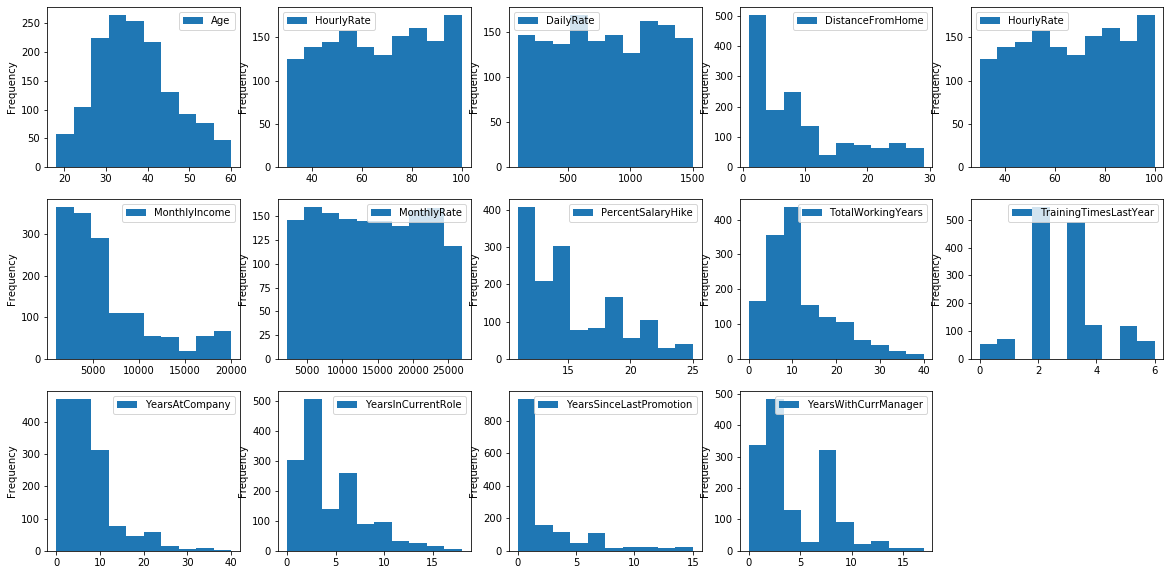

In [131]:
# declarando un objeto tipo Figura para desarrollar los subplots
fig = plt.figure(figsize=(20, 10))

x = 1
# Declarando las graficas de tipo Histograma Variables Númericas
for numAtt in numericColumns:
    ax = fig.add_subplot(3,5,x)
    data[[numAtt]].plot(kind='hist', ax=ax, rwidth=1)
    x = x + 1

### Distribution of categorical and ordinal attributes. 

Let's use pie charts for both

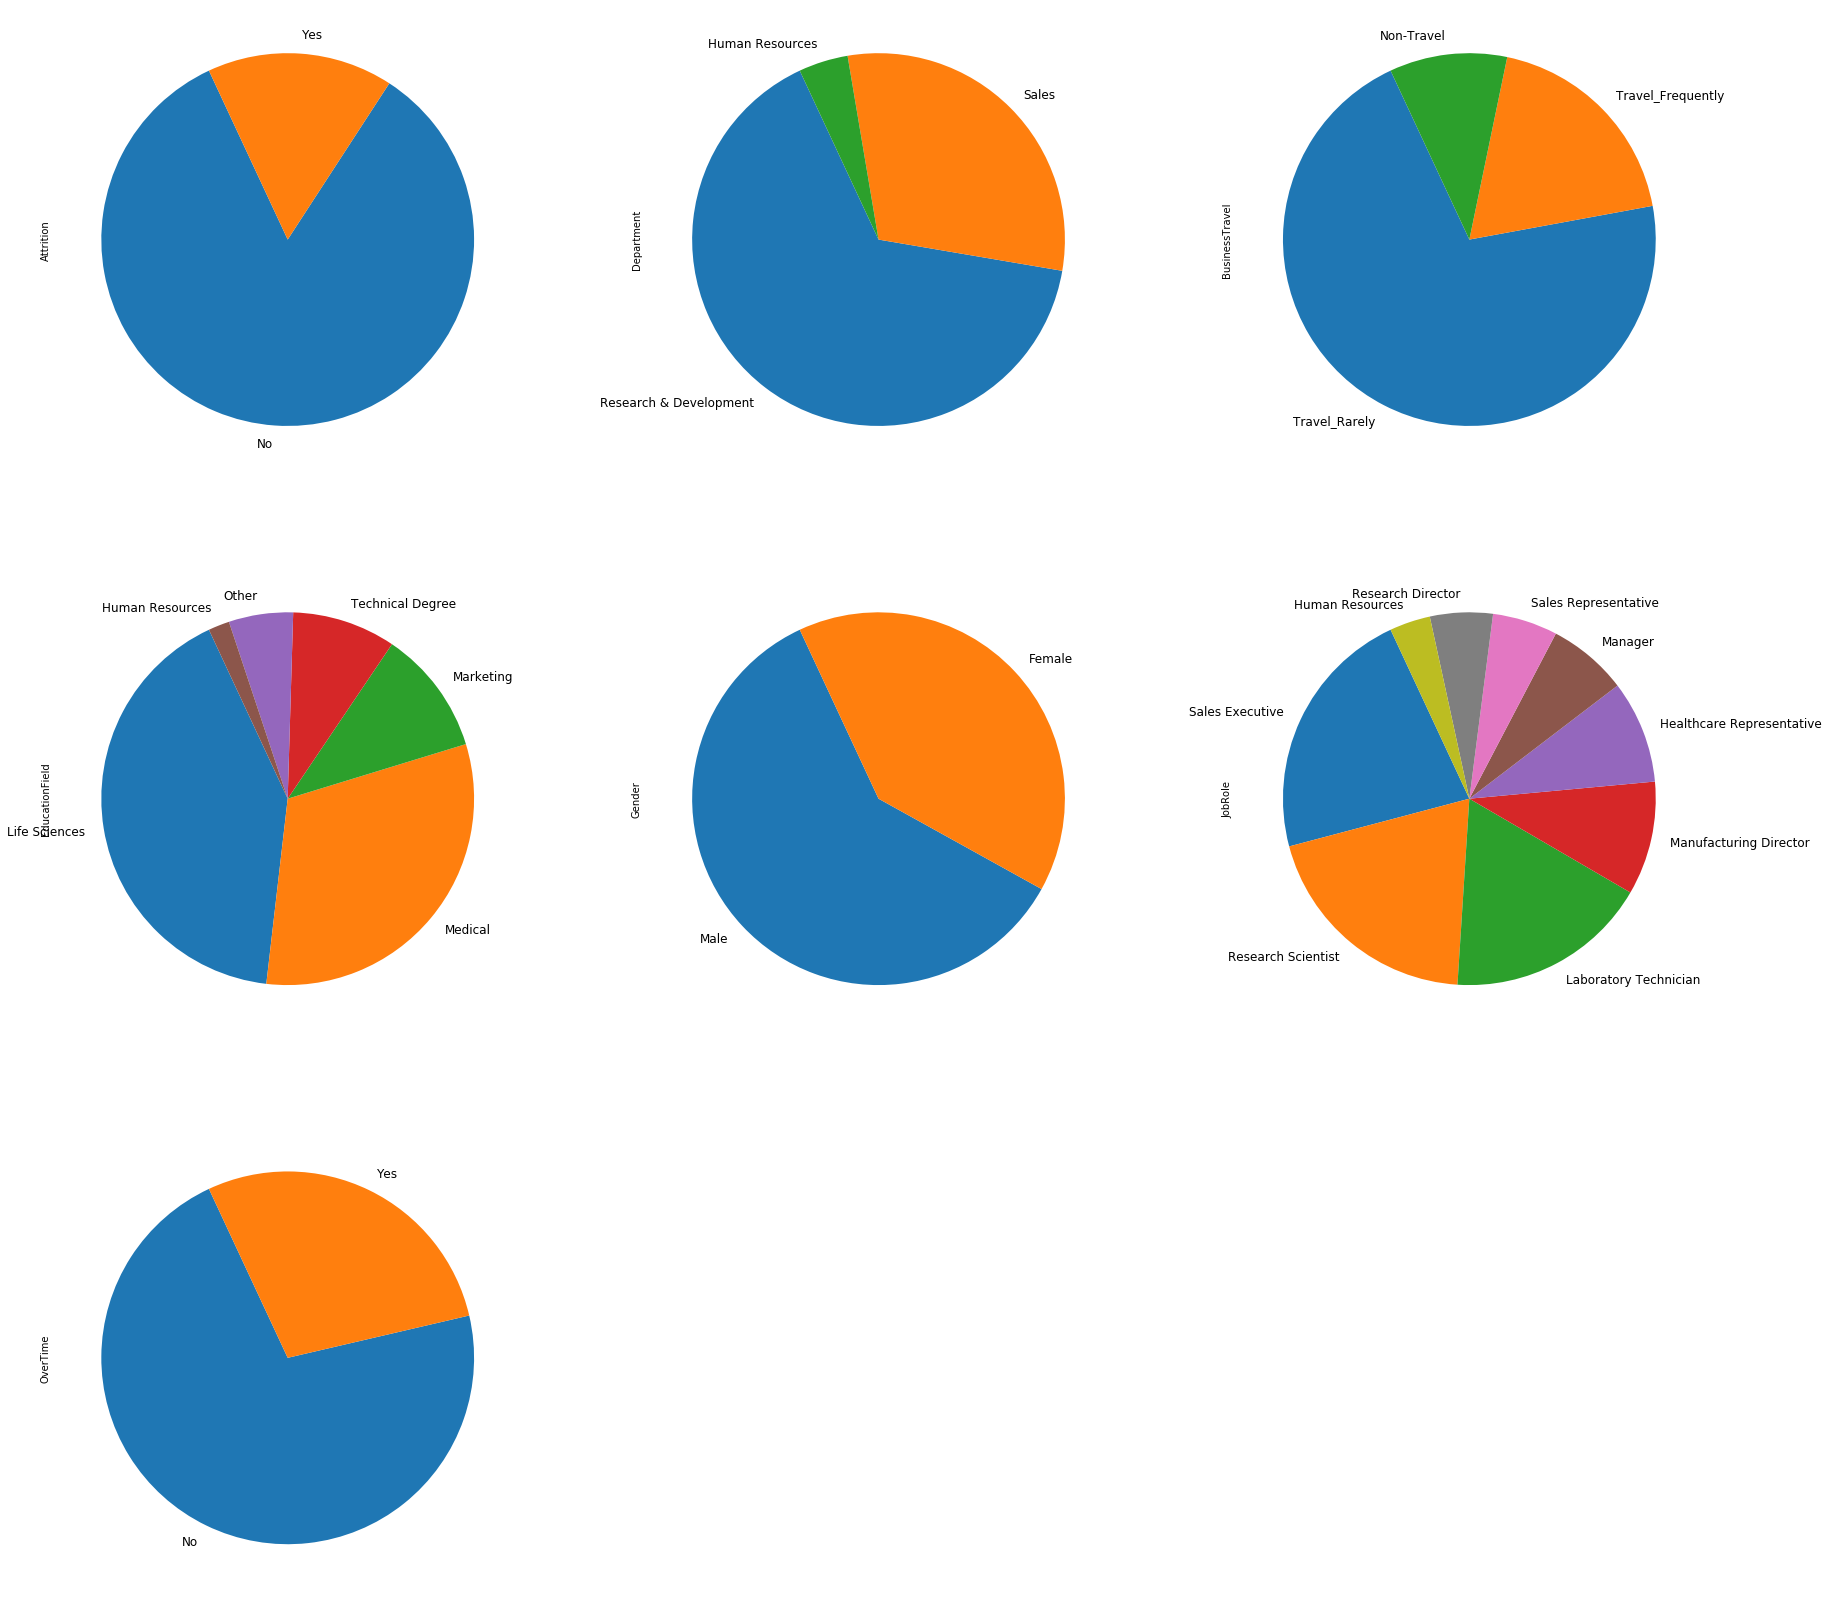

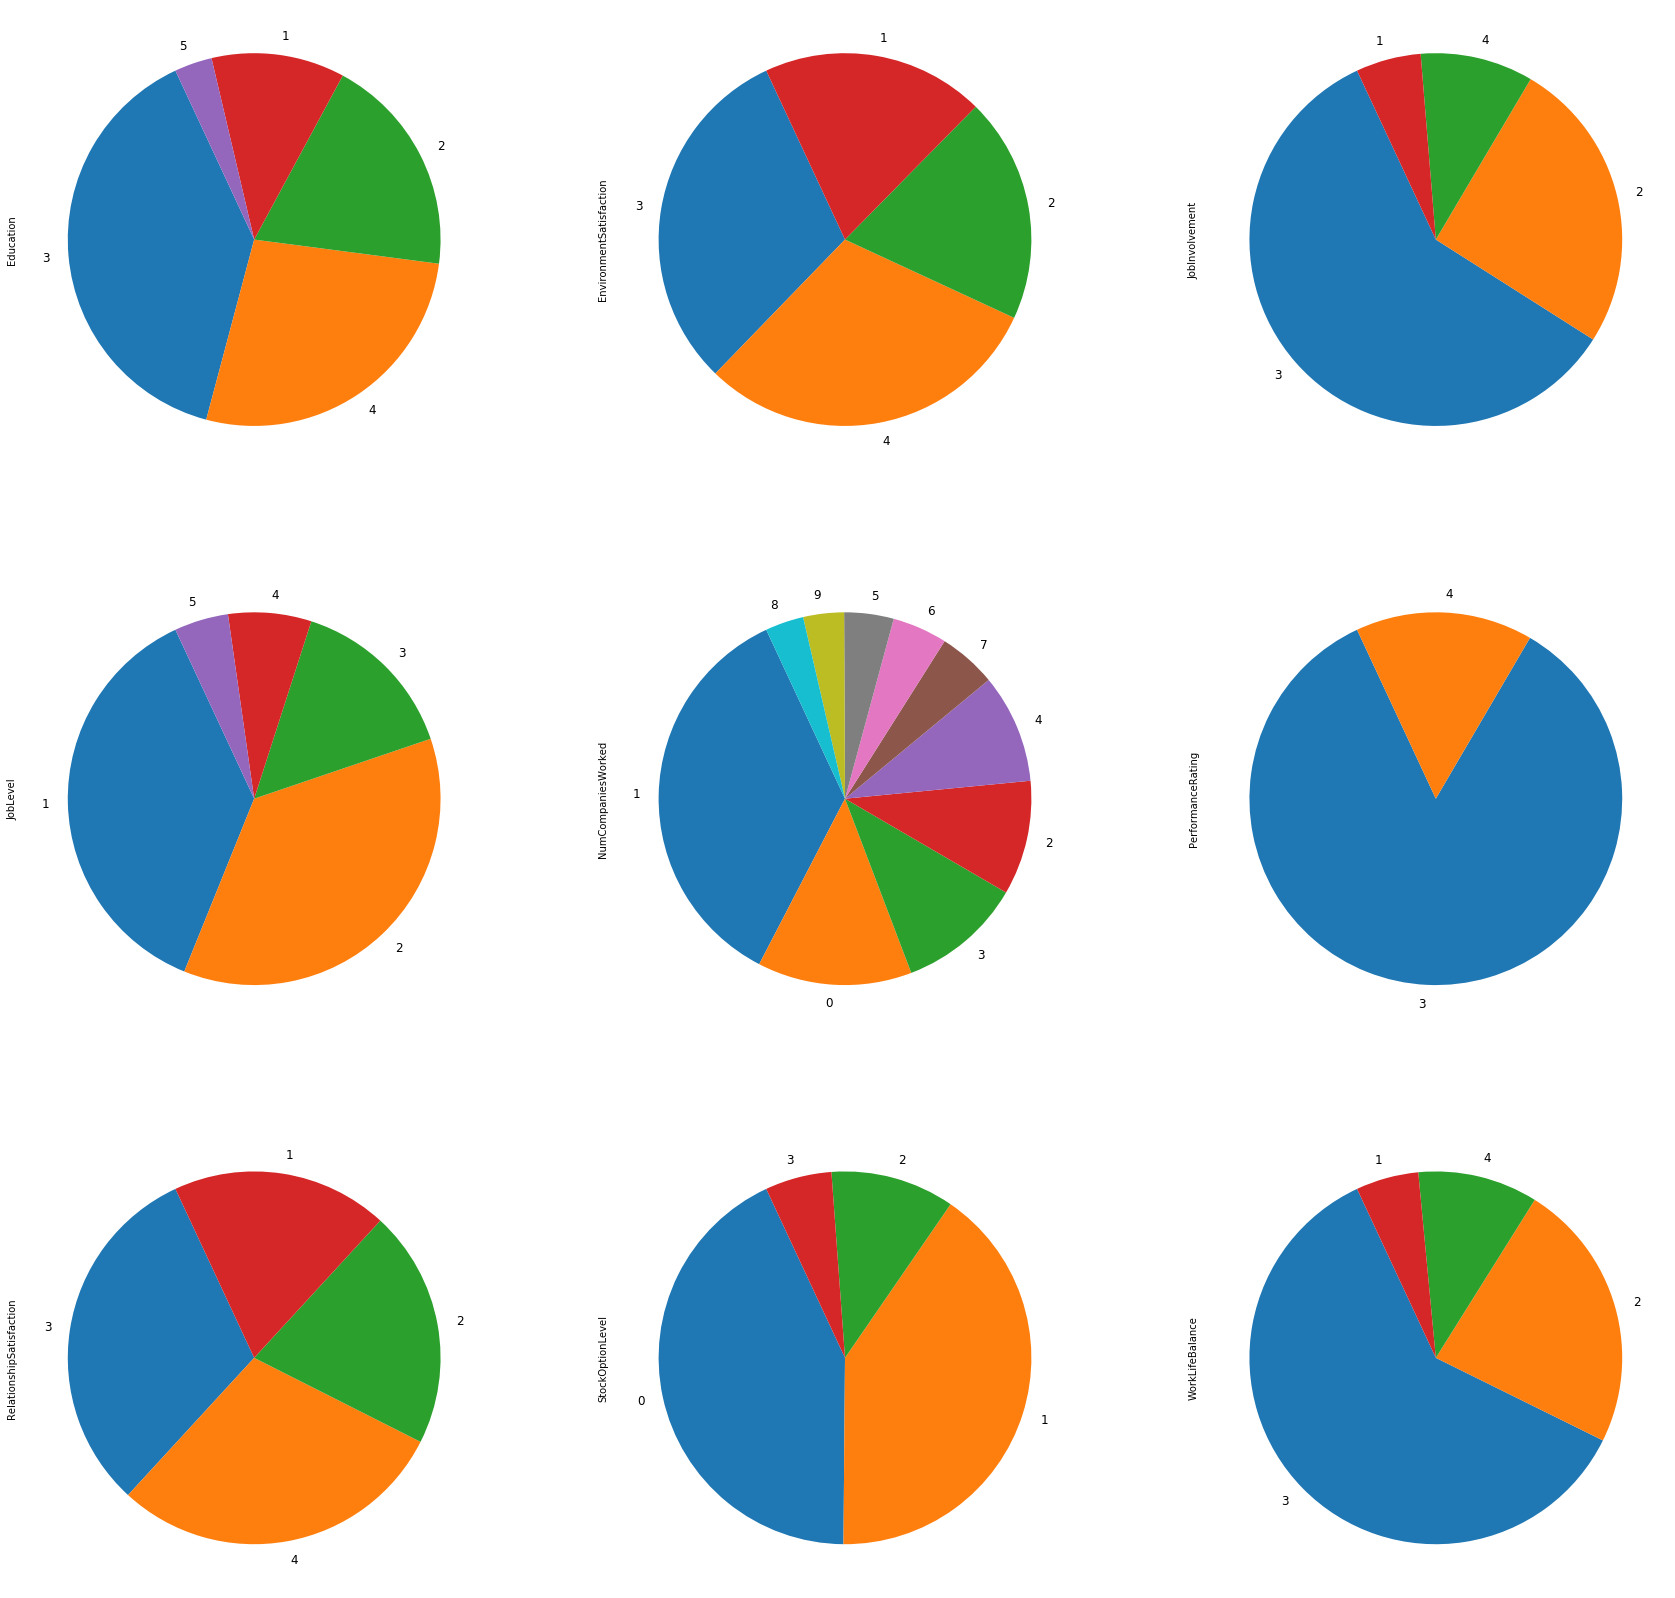

In [132]:
fig = plt.figure(figsize=(30, 60))
x = 1
for catAtt in factorColumns:
    ax = fig.add_subplot(6,3,x)
    data[catAtt].value_counts().plot(kind='pie', ax=ax, startangle=115, fontsize=12)
    x = x + 1
    
plt.show()
fig = plt.figure(figsize=(30, 60))
x = 1
for catAtt in levelColumns:
    ax = fig.add_subplot(6,3,x)
    data[catAtt].value_counts().plot(kind='pie', ax=ax, startangle=115, fontsize=12)
    x = x + 1
plt.show()

### now, lets use histograms. 

For ordinal attributes you better keep the order of the variable, but for no ordinal, 
you better order base on the value count

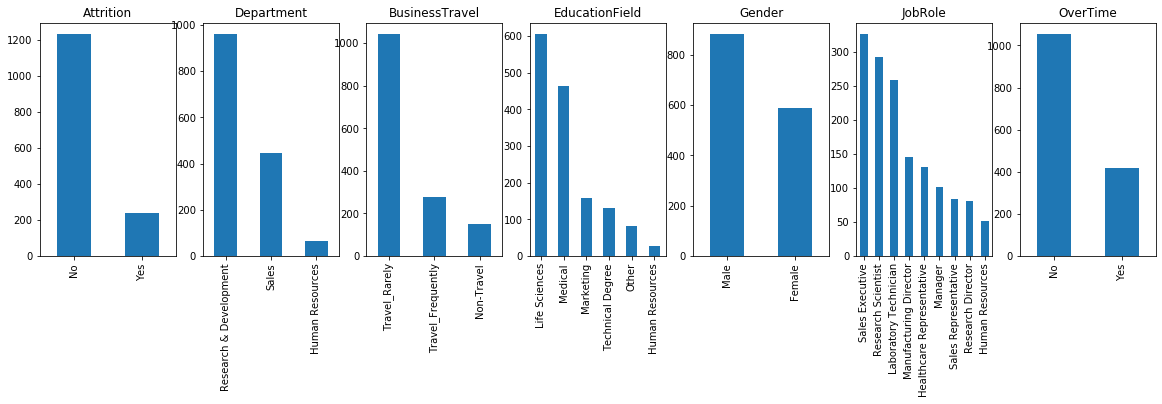

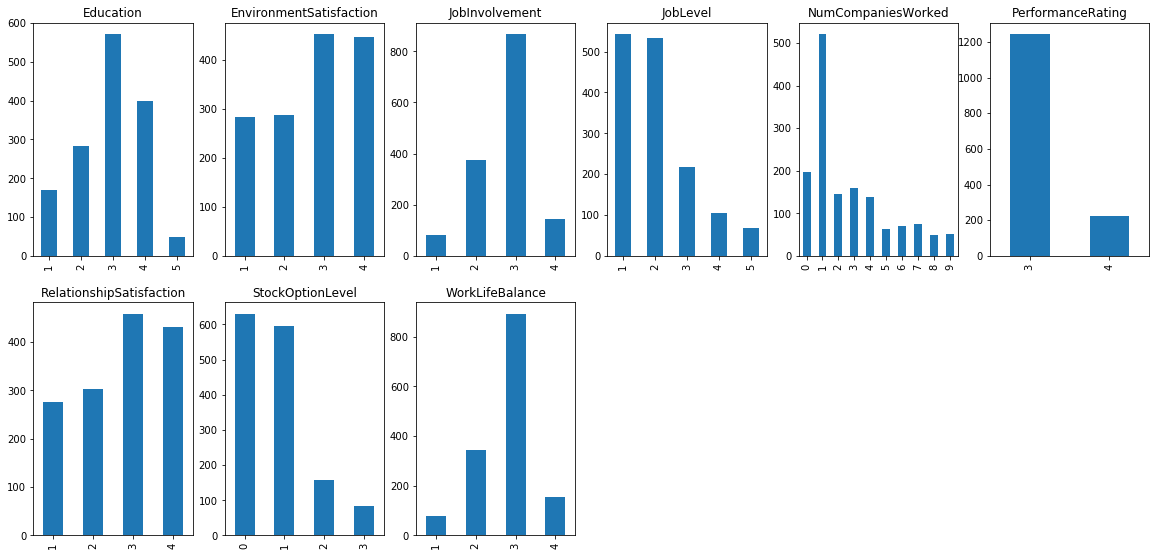

In [133]:
fig = plt.figure(figsize=(30, 100))
x = 1
for catAtt in factorColumns:
    ax = fig.add_subplot(6,7,x)
    data[catAtt].value_counts().plot(kind='bar', ax=ax, figsize=(20, 30), rot=90).set_title(catAtt)
    x = x + 1

fig = plt.figure(figsize=(30, 60))
x = 1
for catAtt in levelColumns:
    ax = fig.add_subplot(6,6,x)
    data[catAtt].value_counts(sort=False).plot(kind='bar', ax=ax, figsize=(20, 30)).set_title(catAtt)
    x = x + 1
plt.show()

## Evaluate if some variables has some classification power

### Violin plots

Let's use seaborn to make some fancy charts for numeric vs categorical data. Violin plots are a powerfull tool for this purpose.

See: https://seaborn.pydata.org/generated/seaborn.violinplot.html

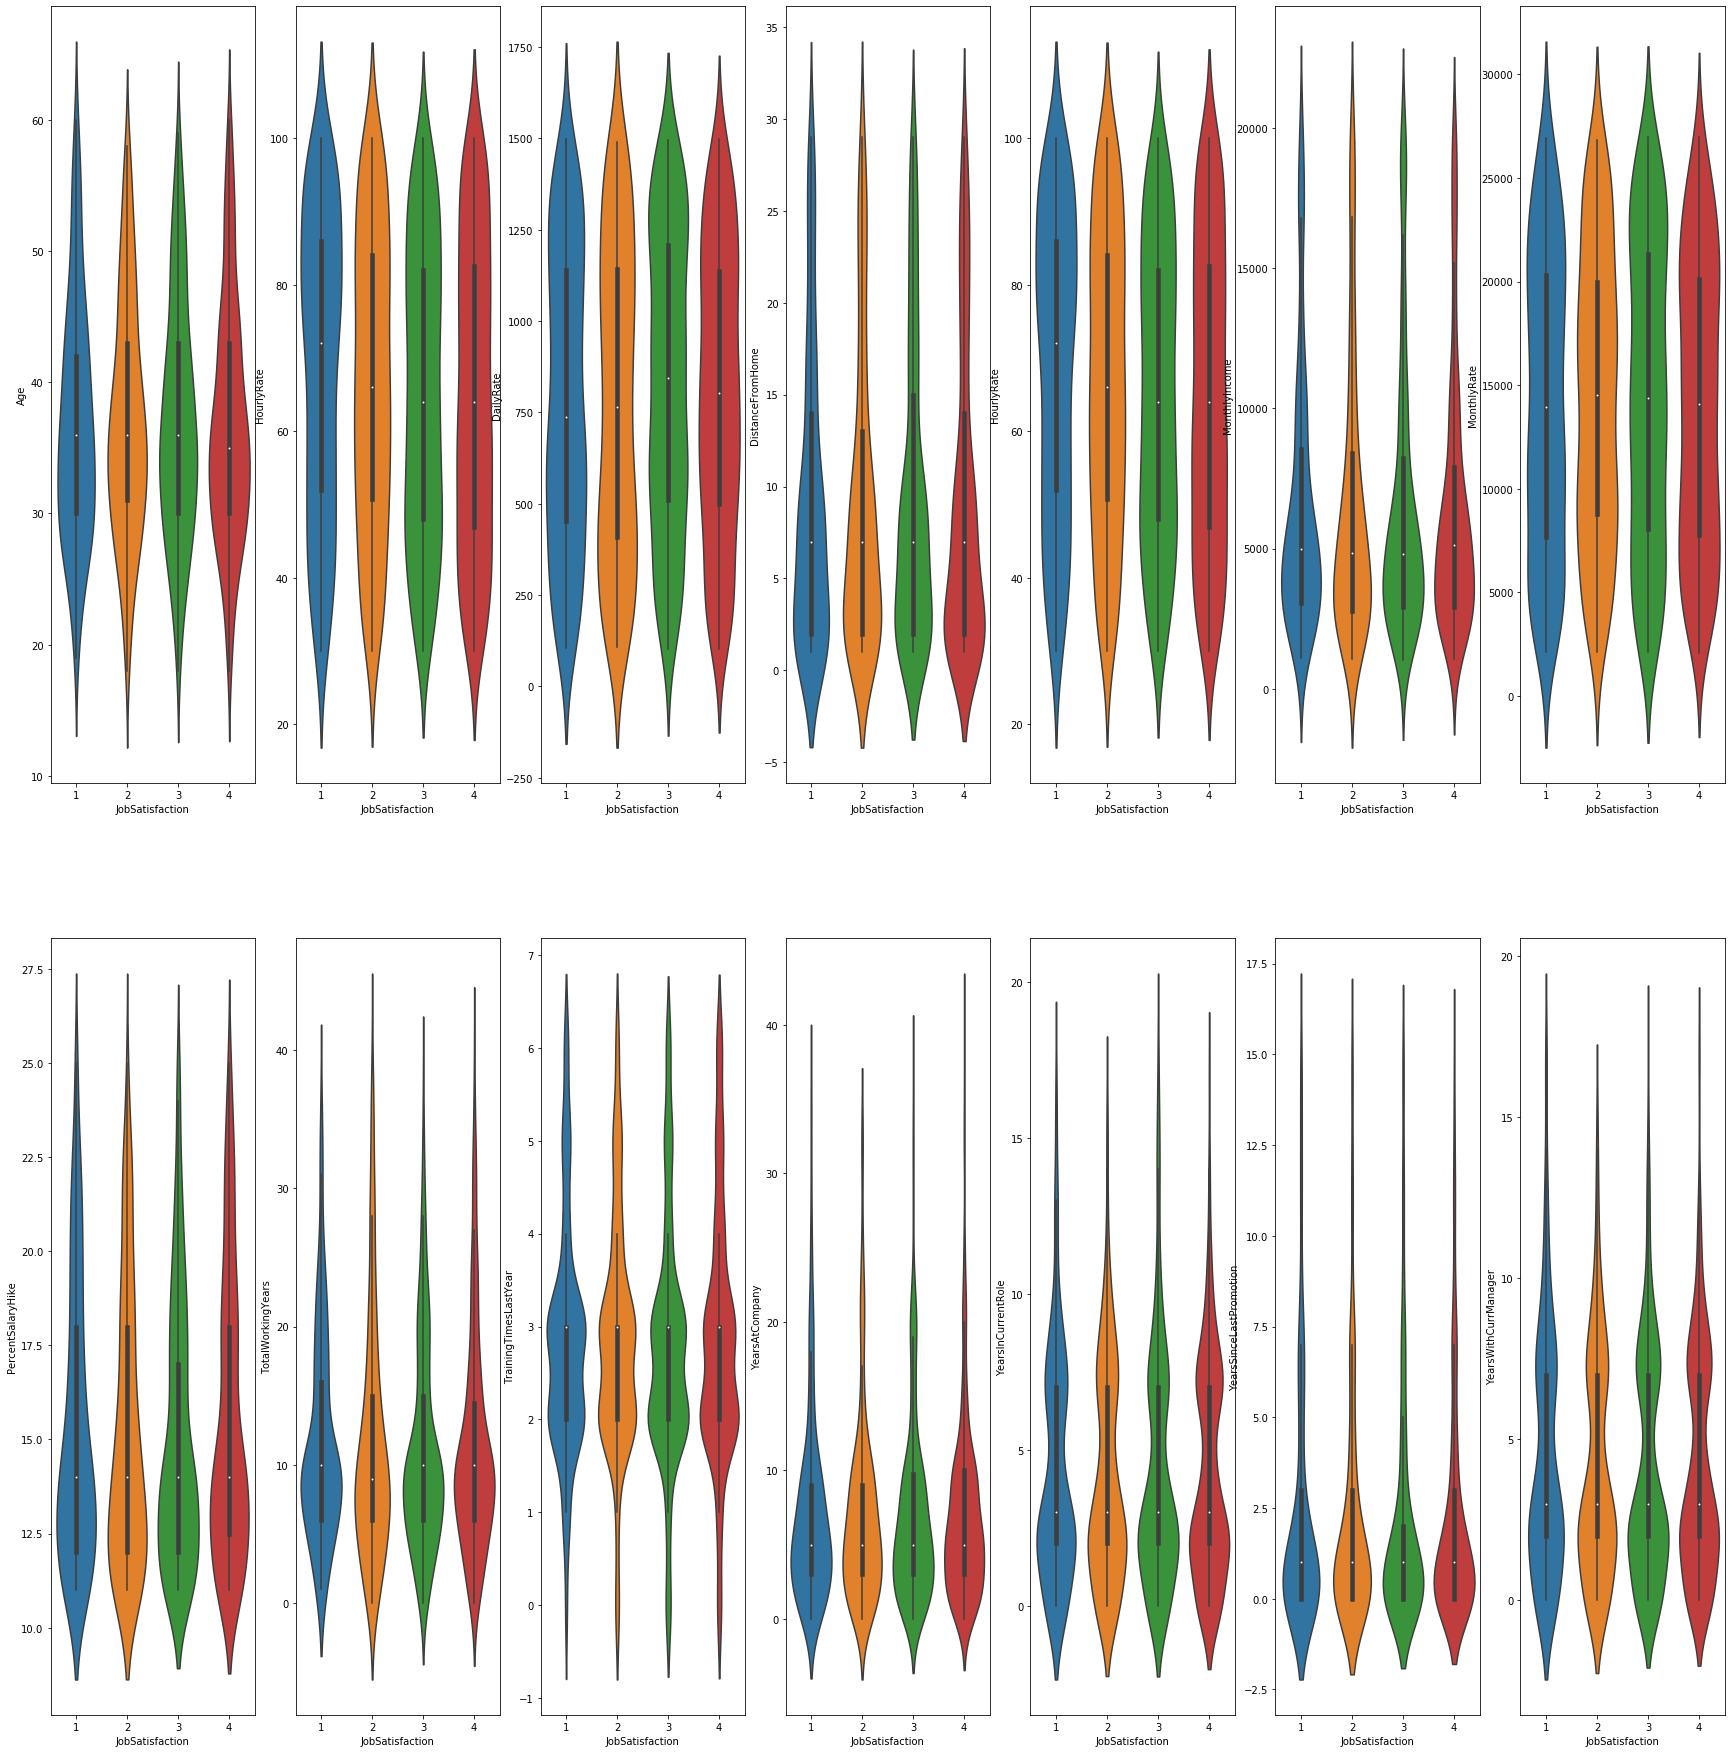

In [116]:
fig = plt.figure(figsize = (30, 100))
x = 1
for numAtt in numericColumns:
    ax = fig.add_subplot(6,7,x)
    sns.violinplot(x = "JobSatisfaction", y = numAtt, data = data)
    x = x + 1

### Box plots

Sometimes, box plots allows to display more clearly the correlation between numeric and categorical attributes

See: https://seaborn.pydata.org/tutorial/categorical.html

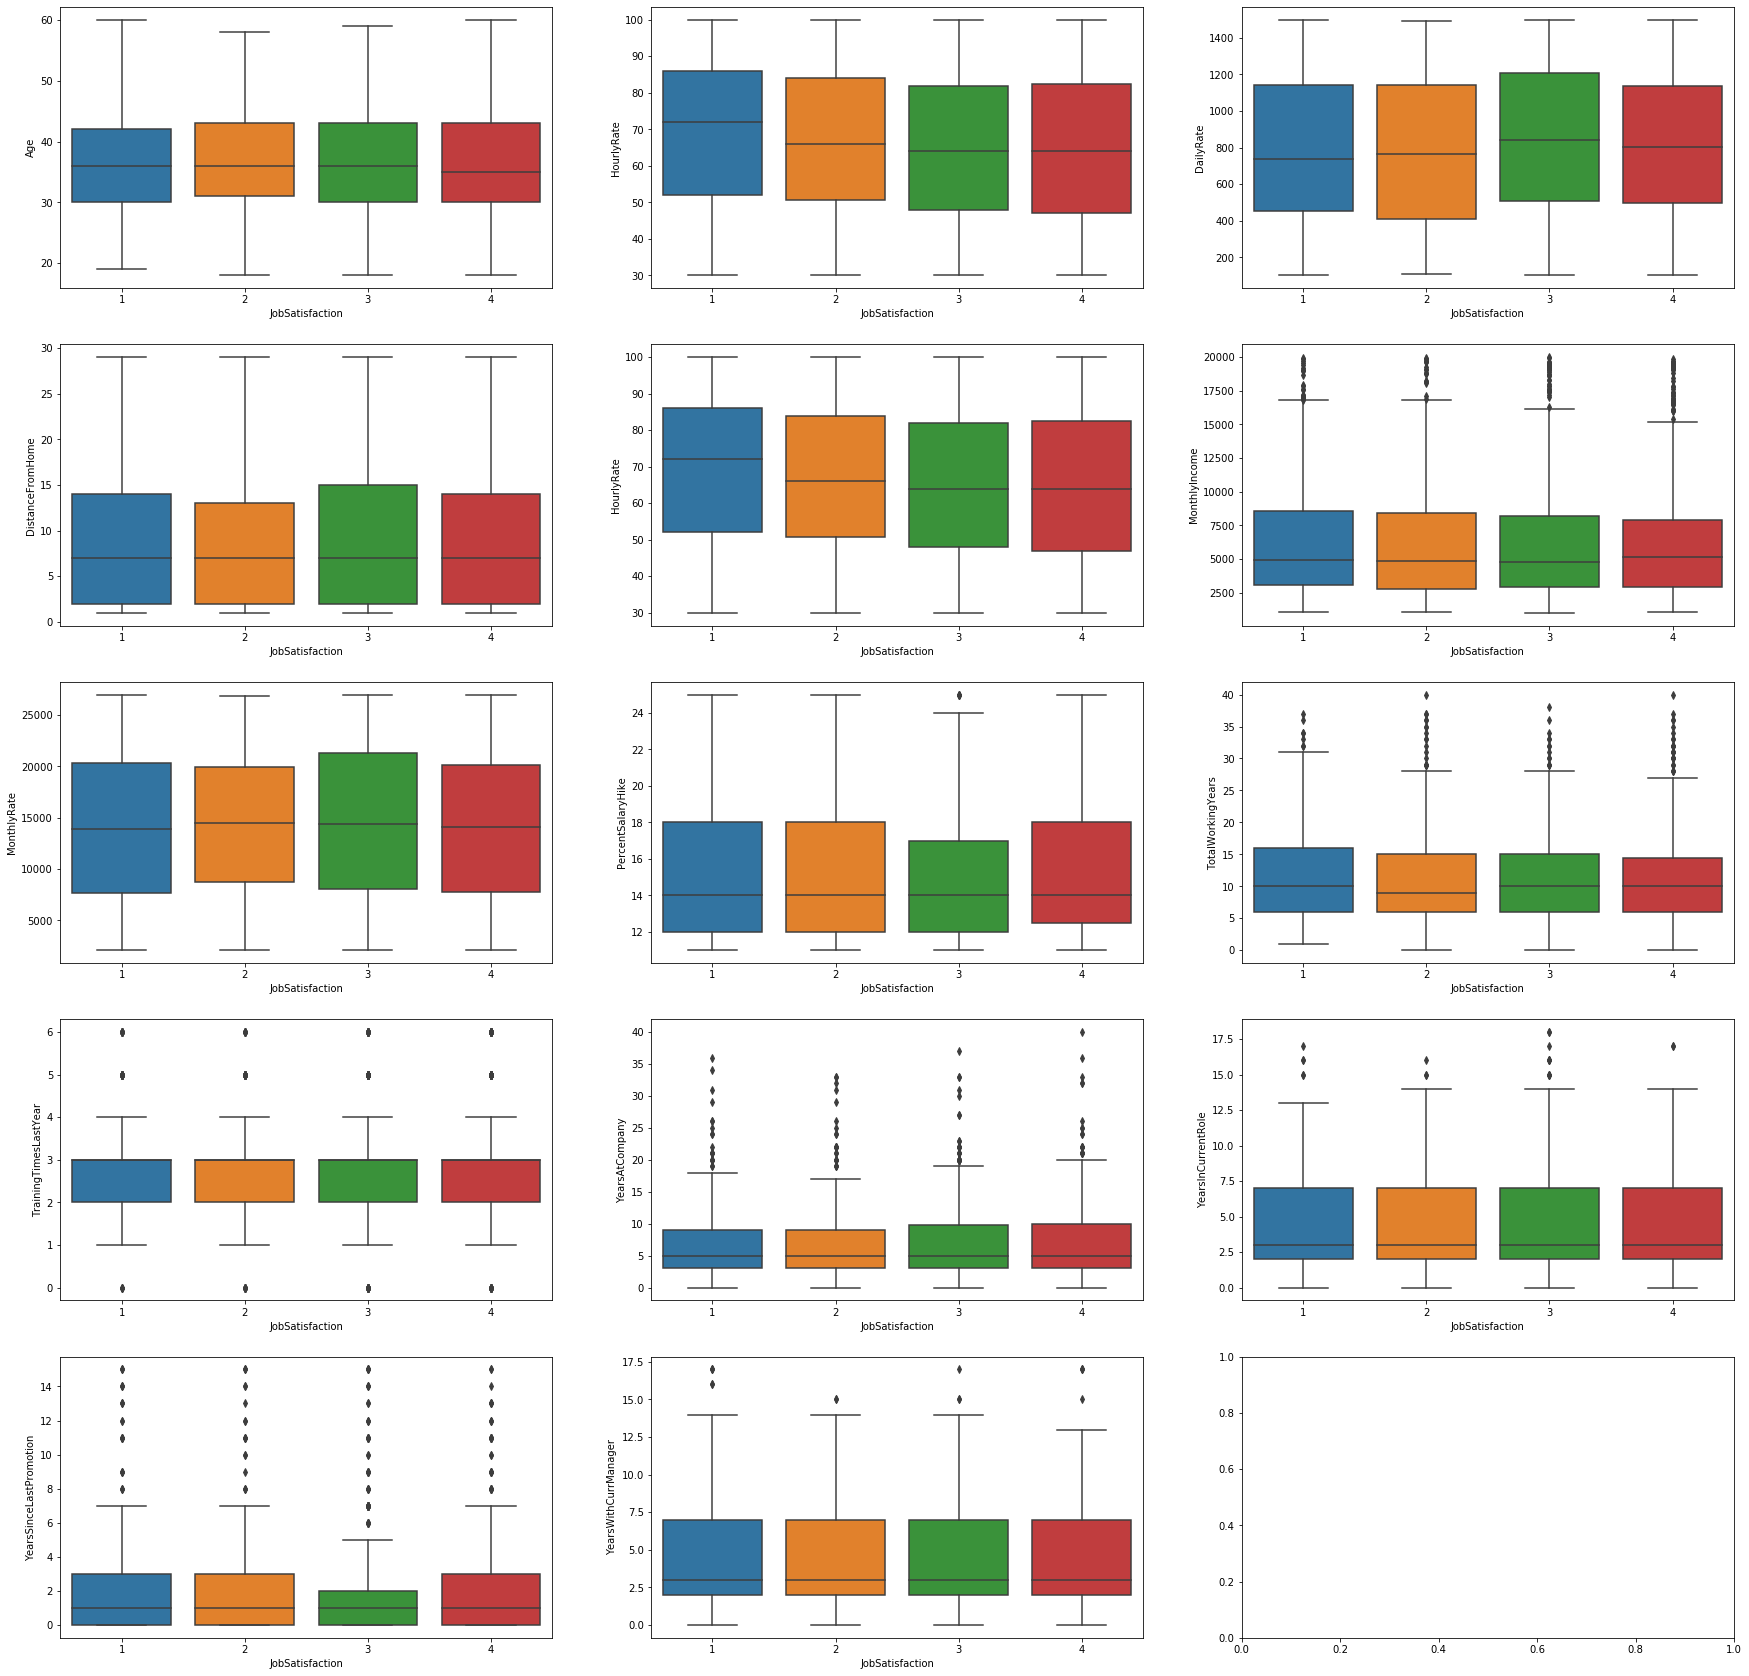

In [117]:
f, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (30,30))
axes = axes.flatten()
x = 0
for numAtt in numericColumns:
    # ax = fig.add_subplot(6,7,x)
    sns.boxplot(x = "JobSatisfaction", y = numAtt, data = data, ax=axes[x])
    x = x + 1

### Do you see something???

## Categorical vs Categorical

Now lets try to determine if some of the categorical attributes has some classification power. Let's try the count plot.

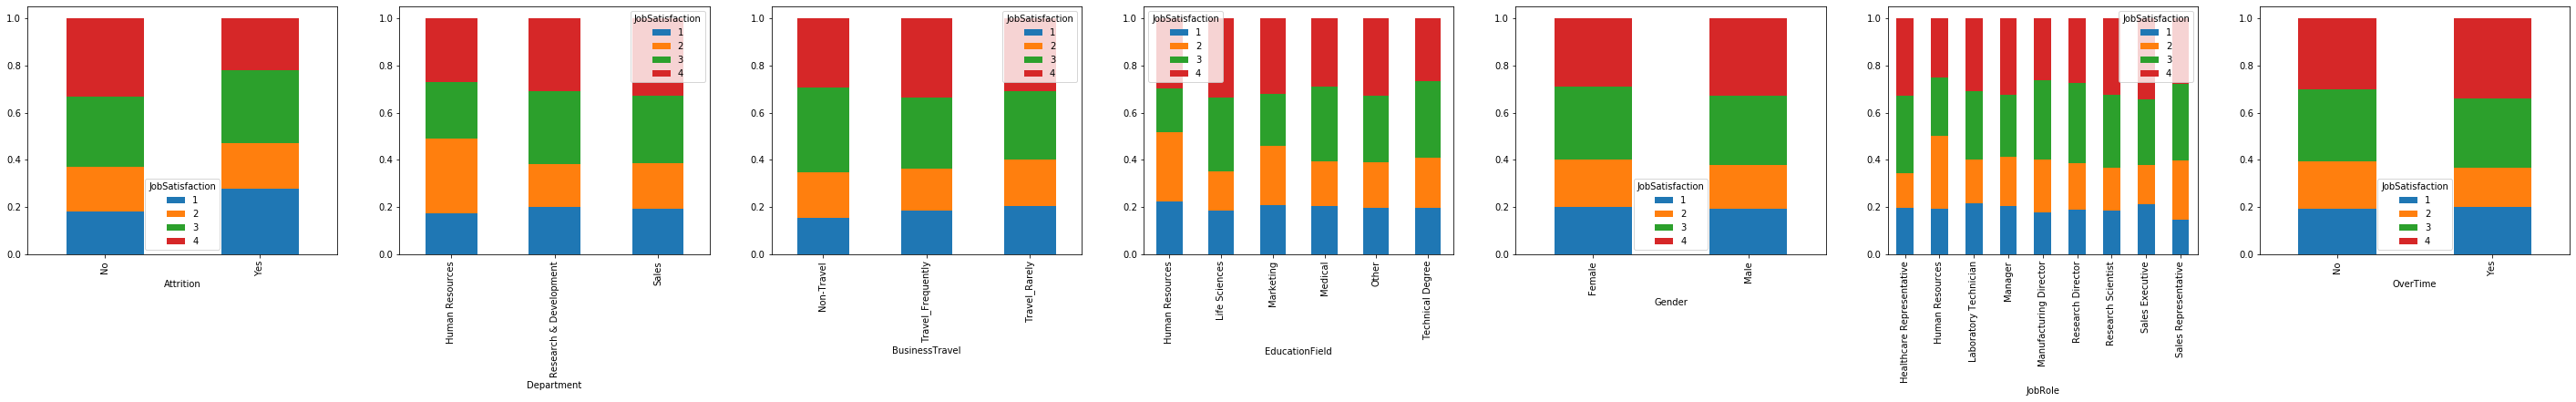

In [118]:
f, axes = plt.subplots(nrows = 1, ncols = 7)
axes = axes.flatten()
x = 0
for catAtt in factorColumns:
    cross = pd.crosstab(index=data[catAtt], 
                        columns=data["JobSatisfaction"],
                        normalize='index')
    cross.plot(kind="bar", 
                 figsize=(50,5),
                 stacked=True,
                 ax=axes[x])

    #sns.countplot(y = catAtt, hue="JobSatisfaction", data=data, ax=axes[x]);
    x = x + 1

# Prepare data for classification

In [134]:
data2 = data.copy()

for catAtt in factorColumns:
    dummies = pd.get_dummies(data2[catAtt], prefix = catAtt)
    data2 = pd.concat([data2.drop(catAtt, axis = 1), dummies], axis = 1)

# Should we do this???
#for catAtt in levelColumns:
#    dummies = pd.get_dummies(data2[catAtt], prefix = catAtt)
#    data2 = pd.concat([data2.drop(catAtt, axis = 1), dummies], axis = 1)


In [135]:
data2.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes
1,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,0,1,0,0,1
2,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,0,1,0,0,1,0
4,37,1373,2,2,4,92,2,1,3,2090,...,0,1,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,0,1,0,0,0,1
7,27,591,2,1,1,40,3,1,2,3468,...,0,1,0,0,0,0,0,0,1,0


# Generate train and test subplot


In [161]:
# Se divide el set de datos en dos conjuntos train y test
y = data2.JobSatisfaction.values
x = data2.drop("JobSatisfaction", axis = 1)
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, stratify = y)

max_depthx = 11
min_samples_splitx = 20
model_tree = tree.DecisionTreeClassifier(max_depth = max_depthx, 
                                             min_samples_split = min_samples_splitx, 
                                             random_state = 1)
model2 = model_tree.fit(trainX, trainY)

#Print the score on the train data
print("On training")
print(model2.score(trainX, trainY))
print(confusion_matrix(model2.predict(trainX), trainY))

#Print the score on the test data
print("\nOn test")
print(model2.score(testX, testY))
print(confusion_matrix(model2.predict(testX), testY))

# Show the confusion matrix

On training
0.5636540330417882
[[116  39  39  33]
 [ 17  75  28  23]
 [ 15  20 171  47]
 [ 54  62  72 218]]

On test
0.2698412698412698
[[25 19 36 28]
 [13 13 17 25]
 [23 28 38 42]
 [26 24 41 43]]


# Visualize the result

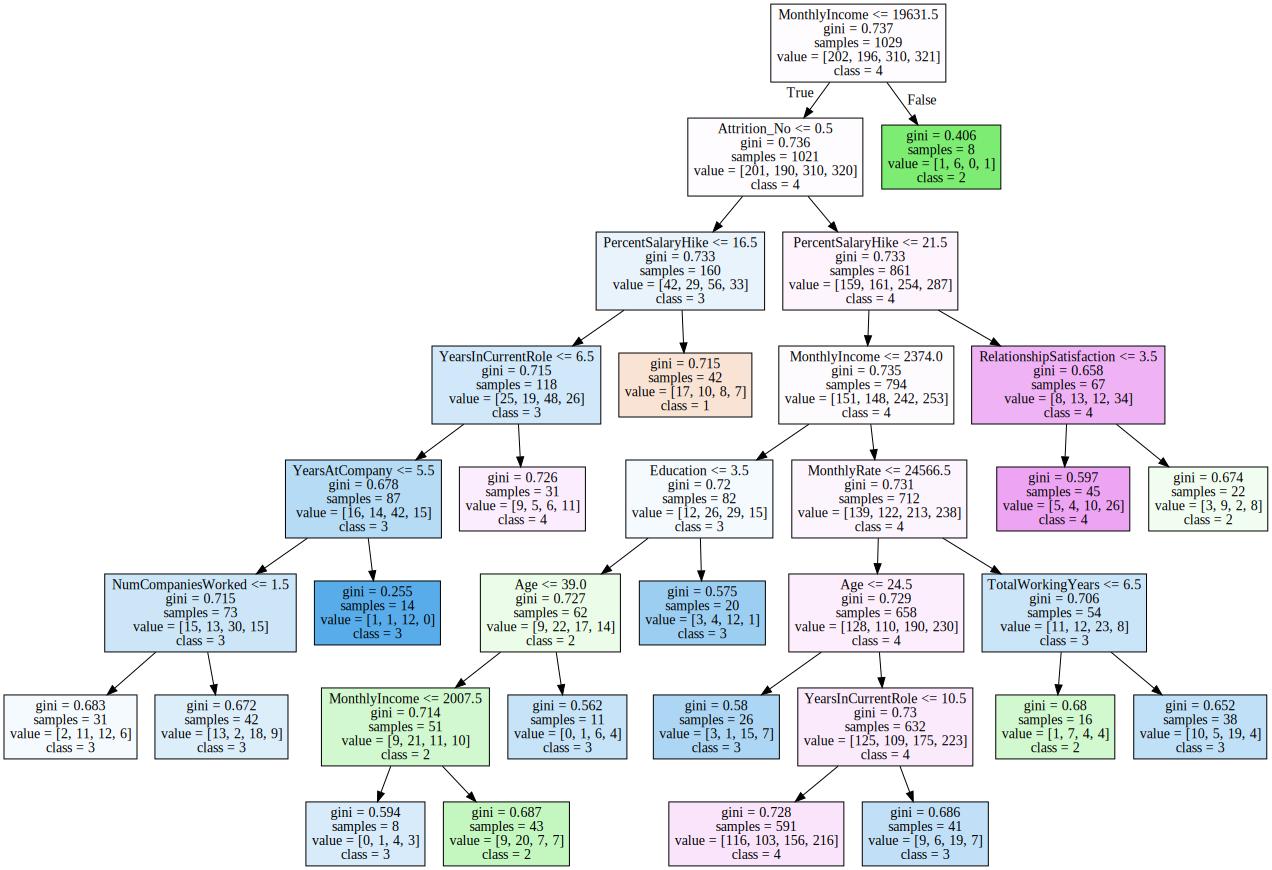

In [144]:
class_names = ["1", "2", "3", "4"]

features_heart_labels = x.columns

graph = Source(tree.export_graphviz(model2, out_file=None,
                                    feature_names=features_heart_labels, 
                                    class_names=class_names, filled = True))

display(SVG(graph.pipe(format='svg')))

In [123]:
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'class',
       'Attrition_No', 'Attrition_Yes', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative